In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmdstanpy

In [6]:
mcycle = pd.read_csv('../data/motorcycle.csv')

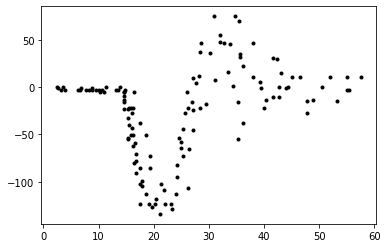

In [13]:
plt.plot(mcycle['times'], mcycle['accel'], '.k')

In [14]:
model = cmdstanpy.CmdStanModel(stan_file='../jx/stanmodels/gpbffg_matern.stan')

INFO:cmdstanpy:compiling stan file /home/js/programs/jx/jx/stanmodels/gpbffg_matern.stan to exe file /home/js/programs/jx/jx/stanmodels/gpbffg_matern
INFO:cmdstanpy:compiled model executable: /home/js/programs/jx/jx/stanmodels/gpbffg_matern


In [15]:
sm = model.sample(
    data = dict(
        x = mcycle['times'],
        y = mcycle['accel'],
        N = len(mcycle),
        c_f = 1.5,
        M_f = 100,
        c_g = 1.5,
        M_g = 100,
    )
)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [16]:
sm.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-16.000,0.3400,11.00,-35.00,-15.000,2.10,1100.0,25.0,1.0
intercept_f,0.280,0.0085,0.43,-0.41,0.290,0.98,2500.0,58.0,1.0
intercept_g,-1.300,0.0100,0.50,-2.00,-1.300,-0.41,2400.0,55.0,1.0
beta_f[1],-0.066,0.0170,0.88,-1.50,-0.068,1.40,2823.0,64.0,1.0
beta_f[2],-0.420,0.0095,0.41,-1.10,-0.410,0.22,1915.0,43.0,1.0
...,...,...,...,...,...,...,...,...,...
sigma[129],13.000,0.0910,5.20,6.60,12.000,22.00,3281.0,74.0,1.0
sigma[130],12.000,0.1000,5.60,5.80,11.000,22.00,2948.0,67.0,1.0
sigma[131],12.000,0.1000,5.60,5.80,11.000,22.00,2948.0,67.0,1.0


In [22]:
simf = sm.stan_variable('f')
simg = sm.stan_variable('sigma')

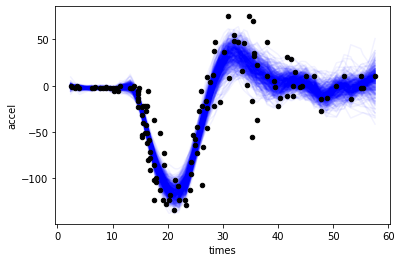

INFO:cmdstanpy:deleting tmpfiles dir: /tmp/tmp3e1kvx4f
INFO:cmdstanpy:done


In [35]:
mcycle.plot('times', 'accel', kind='scatter', zorder=3, c='k')
for i in range(500):
    plt.plot(mcycle['times'], simf[i], c='b', alpha=0.05)